## Lecture 3 - Pre-made Estimators in TF ##
In this Lecture, We are going to use "Estimators," a Tensorflow API that makes the workflow easier for creating a Linear Classification model.

In [2]:
import tensorflow as tf

# Plot drawing library
import matplotlib.pyplot as plt

# Make plots usable in notebook
%matplotlib inline

/Users/cihan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Prepare data ###
We will have 2 features that will be used for model. Let's assume they are math and english scores for a student. We have 40 data points.

In [3]:
data = [[35, 40],[43, 30],[38, 31],[40, 40],
        [30, 50],[40, 60],[30, 50],[20, 60],
        [50, 50],[43, 50],[35, 40],[43, 30],
        [31, 21],[40, 60],[30, 50],[40, 60],
        [27, 67],[45, 54],[34, 43],[43, 40],
        [85, 90],[83, 80],[78, 91],[60, 90],
        [75, 85],[78, 80],[98, 80],[90, 60],
        [93, 83],[73, 93],[82, 94],[93, 62],
        [69, 75],[80, 60],[70, 90],[90, 60],
        [97, 67],[65, 84],[74, 95],[98, 83]]
labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Let's see our data on a plot ###
We created a plot using Matplotlib. As you see, the green dots are the students who are accepted. Our classifier will detect if a new student is accepted or not.

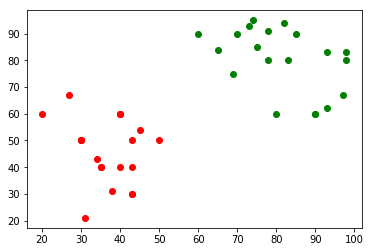

In [4]:
plotX0,plotY0, plotX1, plotY1 = [],[],[],[]
for i in range(len(data)):
    if labels[i] == 0:
        plotX0.append(data[i][0])
        plotY0.append(data[i][1])
    else:
        plotX1.append(data[i][0])
        plotY1.append(data[i][1])
plt.plot(plotX0, plotY0, "ro")
plt.plot(plotX1, plotY1, "go")

### Prepare input function ###
This function will run in training and put the data into the training process.

In [10]:
def input_func():
    global data 
    global labels
    mathArray, englishArray = [], []
    for data_point in data:
        mathArray.append(data_point[0])
        englishArray.append(data_point[1])
    feature_dict = {"math_score": mathArray, "english_score": englishArray}
    return feature_dict, labels

### Create Feature Columns ###
Tensorflow Estimators are using a system called feature columns to get data. We will translete our data to this system. These are just like placeholders that shows where to put data. 

In [6]:
mathFeatureColumn = tf.feature_column.numeric_column("math_score")
englishFeatureColumn = tf.feature_column.numeric_column("english_score")

student_feature_columns = [mathFeatureColumn, englishFeatureColumn]

### Create an Linear Classification Estimator ###

In [7]:
LCEstimator = tf.estimator.LinearClassifier(feature_columns = student_feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_7/c28_8vl522n4nj1h8x0r4m300000gn/T/tmp3lqrglnz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181c696080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the Linear Classification Estimator ###

In [11]:
LCEstimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_7/c28_8vl522n4nj1h8x0r4m300000gn/T/tmp3lqrglnz/model.ckpt.
INFO:tensorflow:loss = 27.725887, step = 1
INFO:tensorflow:global_step/sec: 508.966
INFO:tensorflow:loss = 17.027775, step = 101 (0.199 sec)
INFO:tensorflow:global_step/sec: 976.505
INFO:tensorflow:loss = 13.636424, step = 201 (0.103 sec)
INFO:tensorflow:global_step/sec: 1019.56
INFO:tensorflow:loss = 11.729805, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 272.574
INFO:tensorflow:loss = 10.310789, step = 401 (0.366 sec)
INFO:tensorflow:global_step/sec: 721.135
INFO:tensorflow:loss = 9.213791, step = 501 (0.136 sec)
INFO:tensorflow:global_step/sec: 1062.14
INFO:tensorflow:loss = 8.34023, step = 601 (0.094 sec)
INFO:tensorflow:

Have a good day...